## Matplotlib minimum for scientific computing

### About

This is part of lecture notes of Math 104A *Introductory Numerical Analysis* course offered at the University of California Santa Barbara (Fall 2023). 
Author: Jea-Hyun Park

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)
Part of the content of this notebook is borrowed from the reference mentioned below. Thanks to all the authors sharing excellent knowledge.

### Reference

Main reference.

| Reference | Brief description |
|---|---|
| [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html), </br>   | Tutorial offered by the official website of Matplotlib. |
|[Scientific Python Lectures](https://lectures.scientific-python.org/index.html) (online booklet) | Chapters 1.1-1.4 summarizes Python and NumPy. |

### Opening warning and advice

> ***Warning***
>
> - There are two different style of coding for `matplotlib`: *explicit* and *implicit*. We only use **explicit** style in this course.

**Reason**

- Since there are two different styles and many resources on the web does not mention this, you will likely get confused if you search for a solution to a small problem at hand. In the long run, the explicit style (also called *OO-style*) is more useful. This is because it is easier to build fine-tuning on what you already know. What is more, it is not any harder than the implicit style.
- Implicit style mimics Matlab plotting. Though it is quick for simple plots, it gets more and more clumsy as you want more control.


> ***Advice***
>
> Do your best to use precise terminology. 

Matplotlib uses some everyday words in its particular way. For example, we are familiar with the words 'line', 'label', 'axis', and 'axes'. However, they are used as technical terms and refer to very specific objects. 

### Anatomy of Matplotlib plots

![Anatomy of Matplotlib plots](https://matplotlib.org/stable/_images/anatomy.png)

### Typical scenario 1: several plots in a single `axes`

Following code block is borrowed from the Matplotlib documentation.

> ***Important summary***
>
> - `axes` object is the "actual picture" from our intuitive perspective. That is, we plot graphs on `axex` object.
> - `axes` is an independent, technical terminology. It is different from the usual sense of a plural of axis.
> - `figure` object is more like a container of all pictures we have in our mind. 
> - Use `plt.subplots` even when you draw only one plot. Then, the statement stays the same when you really want multiple subplots.
> - If you use precise terminology (e.g., distinguish 'label', 'title', etc), then it will save a lot of googling over time. 

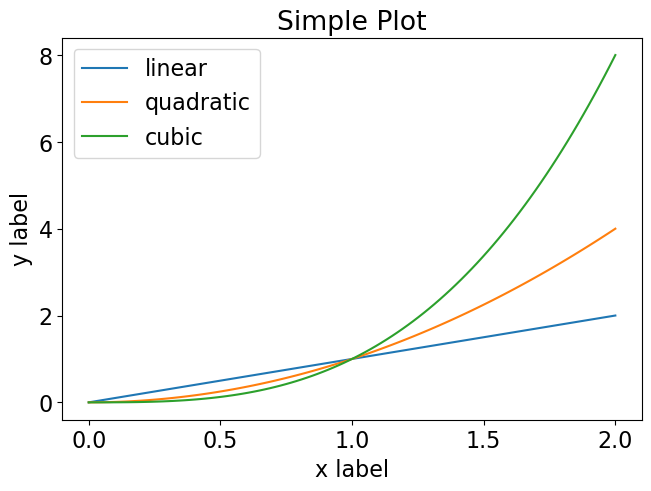

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# This is really useful and frees us from managing font sizes of title, label, etc. for every single objects.
plt.rcParams.update({'font.size' : 16})

x = np.linspace(0, 2, 100)  # Sample data.

# OO-style in effect

# Constructs a `figure` and `axes` objects
# `plt.subplots` returns a `figure` and a `axes` (or a list of `axes`s if multiple subplots are requested).
fig, ax = plt.subplots(layout='constrained') 

# Plots functions on the `axes` object
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.

# Fine tune details of the picture
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

### Typical scenario 2: Multiple `axes` in one `figure`

#### Steps for simple cases

- Step 1: create `figure` and `axes` objects using `plt.subplots`
- Step 2: plot the data using methods of `axes` (`.plot`, `.scatter`, etc.)
  - It is good to give some options here.
  - It is convenient to use shorthand line spec: `b^--` is equivalent to `color='blue', marker='^', linestyle='--'`. For more details, see [Summary of line, marker styles](https://lectures.scientific-python.org/intro/matplotlib/index.html#quick-references), [list of linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), [list of markers](https://matplotlib.org/stable/api/markers_api.html), [list of colors](https://matplotlib.org/stable/gallery/color/named_colors.html).
  - It is also convenient to use abbreviations for keywords (e.g., `mfc` for `markerfacecolor`). For more details, see [`Line2D` properties](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib-lines-line2d)
- Step 3: Fine-tune the details using methods of `axes`
  - Title: `ax.set_title`, 
  - axis-labels: `axes.set_xlabel` and `ax.set_ylabel`, etc.
  - ticks: `ax.set_xticks` etc.
  -  You can use LaTeX in texts (e.g., titles, labels, etc). Just put them between `$`'s.
  - If your LaTeX code includes escape character (`\`; e.g. for Greek letters `"$\sigma$"`), use the *raw string*, e.g. `r"$\sigma$"`.
- Step 4: (optional) Save figure using `figure.savefig`.
  - Pass file name and dpi (dots per inch) to the method. 

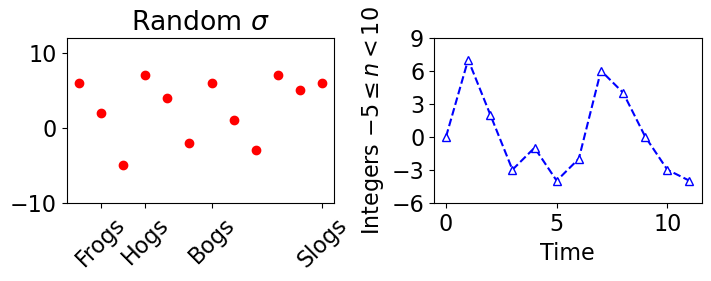

In [30]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
t = np.arange(n)
s = np.random.randint(-5, 10, n)
u = np.random.randint(-5, 10, n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
ax1.plot(t, s, 'or')
ax1.set_ylim(np.min(s) - 5, np.max(s) + 5)
ax1.set_title(r"Random $\sigma$")
ax1.set_xticks([1, 3, 6, 11], ['Frogs', 'Hogs', 'Bogs', 'Slogs'], rotation=45)

ax2.plot(t, u, 'b^--', mfc='w') # This is equivalent to the line below
# ax2.plot(t, u, color='blue', marker='^', linestyle='--', markerfacecolor='w')
ax2.set_xlabel('Time')
ax2.set_ylabel(r'Integers $-5 \leq n < 10$')
ax2.set_yticks(np.arange(-6, 10, 3));

fig.savefig("fig.png", dpi=200)

### Others

#### Plot images: `imshow` 

- Syntax: `ax.imshow(img)`, where `img` is a 2D `numpy.ndarray`.

This is not the focus of this course. But we need bare minimum to plot images to confirm computational comparisons. For the minimum we need, see [NumPy example on vectorized coding](./numpy_basics.ipynb#test-vectorized-vs-for-loop).

#### Axis scales

- `ax.set_xscale('log')`, `ax.set_yscale('linear')`

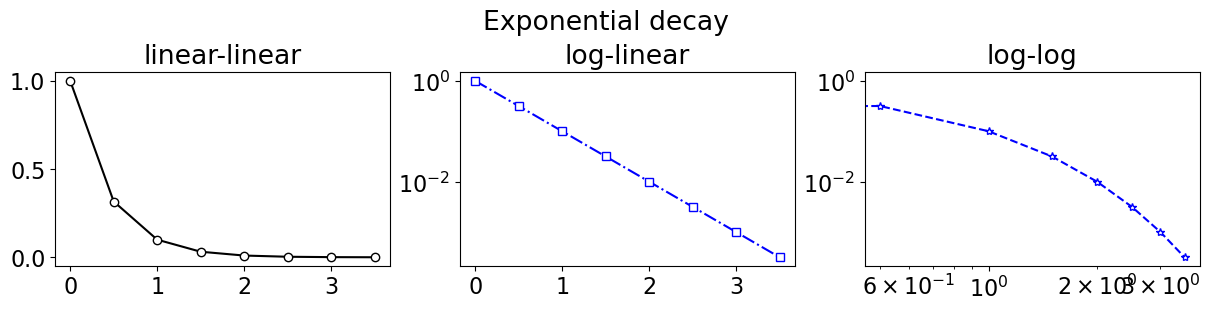

In [31]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 4, 0.5)
y = 10**(-x)

fig, ax = plt.subplots(1, 3, figsize=(12, 3), layout='constrained')

fig.suptitle("Exponential decay") # super title
ax[0].plot(x, y, 'ok-', mfc='w')
ax[0].set_title("linear-linear")

ax[1].plot(x, y, 'sb-.', mfc='w')
ax[1].set_yscale('log')
ax[1].set_title("log-linear")


ax[2].plot(x, y, '*b--', mfc='w')
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[2].set_title("log-log")

plt.show()


#### Aspect ratio

> ***Note***
>
> There are two kinds of aspect ratio.

| Type | Meaning | Method |
|---|---|---|
| y/x scaling | Ratio of the data y/x be controled. | `ax.set_aspect(1)` |
| box aspect | Ratio of width and height of final picture (i.e., `axes` box) be controled.| `ax.set_box_aspect(1)` |

You can choose what to compromise when there is a conflict.

- `ax.set_adjustable('datalim')`: Okay to adjust xlim or ylim, but prioritize other things.
- `ax.set_adjustable('box')`: Okay to adjust picture width and height, and prioritize other things.

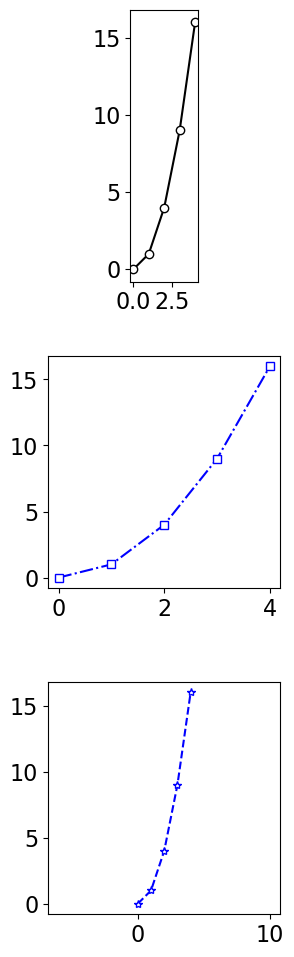

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
y = x**2

fig, ax = plt.subplots(3, 1, figsize=(3, 12))

# set aspect ratio by controling y/x scaling
ax[0].plot(x, y, 'ok-', mfc='w')
ax[0].set_aspect(1)

# set aspect ratio by controlling box aspect ratio (height/width)
ax[1].plot(x, y, 'sb-.', mfc='w')
ax[1].set_box_aspect(1)

# Require both y/x scaling and box aspect, but may not be what you want
ax[2].plot(x, y, '*b--', mfc='w')
ax[2].set_aspect(1)
ax[2].set_box_aspect(1)


#### Helper functions

We can make our life way easier by making *helper functions*. 

Helper functions:

- User defined functions that are tailored for your own need.

Example syntax ([Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/quick_start.html))
```
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

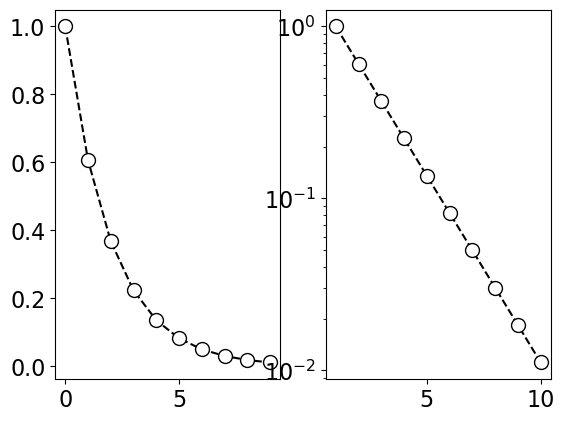

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_seq(ax, y, x=None, param_dict = {}):
    """
    A helper function to plot sequence data.
    """
    if x is None:
        out = ax.plot(y, **param_dict)
    else:
        out = ax.plot(x, y, **param_dict)

    return out

x = np.arange(10)
y = np.exp(-.5*x)

param_dict = {'color': 'k', 'linestyle': '--','marker': 'o', 'markerfacecolor': 'w',
    'markersize': 10}

fig, (ax1, ax2) = plt.subplots(1,2)

plot_seq(ax1, y, param_dict=param_dict)

plot_seq(ax2, y, x=x+1, param_dict=param_dict)

ax2.set_yscale('log')


#### 3D curves

- Use the keyword `subplot_kw={'projection': "3d"}`.
- You can use unpacking when your data is packed as a 2d array.

(3, 1000)


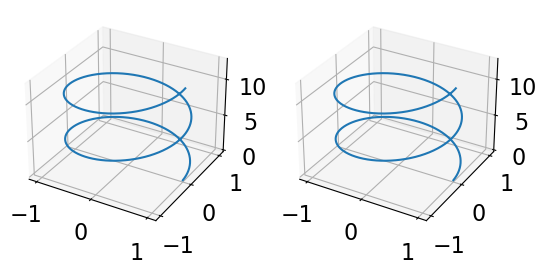

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# change the overal font size 
plt.rcParams.update({"font.size": 16})

# parameter 0 <= t <= 4pi
t = np.linspace(0, 4*np.pi, 1000)

# helix (cos(t), sin(t), t)
x = np.cos(t)
y = np.sin(t)
z = t

# create subplots for 3d plots
fig, ax = plt.subplots(1,2, subplot_kw={'projection': "3d"})

# plot a curve
ax[0].plot(x, y, z)

# stack the coordinates into one array
X = np.concatenate((x.reshape((1,-1)), y.reshape((1,-1)), z.reshape((1,-1))), axis=0)
print(X.shape)

# plot using unpacking
ax[1].plot(*X)

plt.show()

#### Animation

If *time* makes sense in your computational result, animation may be a great way to visualize it. There are multiple ways to create animations. Here, we include one of them. Other ways may be better in terms of efficiency, but this is the most straightforward to understand. 

> **Warning**
>
> Making animations requires movie-making packages. We use *Pillow*, which works for gif animations. You can install it by type the following in the command line: (See the [documentation](https://pypi.org/project/Pillow/) for more details.) 
> 
> `$ pip install Pillow`

We use a *context manager* `with writer.saving(....):`. In plain English, it means "with a vidoe writer open, we want to do the following things":
  1. (optional, but good to have) print progress message,
  2. prepare a still shot, 
  3. save the still shot: `writer.grab_frame()`
  4. clear `axes` so that the next frame is drawn anew: `plt.cla()`. 

0-th time still shot saved to the gif file.
10-th time still shot saved to the gif file.
20-th time still shot saved to the gif file.
30-th time still shot saved to the gif file.
40-th time still shot saved to the gif file.
50-th time still shot saved to the gif file.
60-th time still shot saved to the gif file.
70-th time still shot saved to the gif file.
80-th time still shot saved to the gif file.
90-th time still shot saved to the gif file.
100-th time still shot saved to the gif file.
110-th time still shot saved to the gif file.
120-th time still shot saved to the gif file.
130-th time still shot saved to the gif file.
140-th time still shot saved to the gif file.
150-th time still shot saved to the gif file.
160-th time still shot saved to the gif file.
170-th time still shot saved to the gif file.
180-th time still shot saved to the gif file.
190-th time still shot saved to the gif file.
200-th time still shot saved to the gif file.
210-th time still shot saved to the gif file.

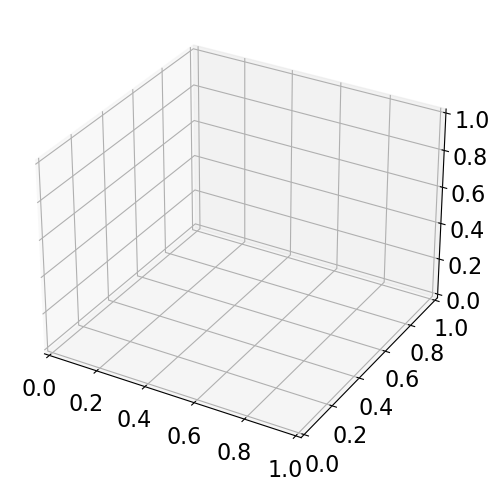

In [3]:
"""This example saves a gif file of a 3d curve. 
Assumption: X is a 3 by KK array that has already been computed by the main computation block, where KK is the number of time grid points that is greater than `tot_frames`.
"""
# import PillowWriter (a movie writer class)
from matplotlib.animation import PillowWriter

# create a writer instance (fps: frames per second)
writer = PillowWriter(fps=15)

# create a figure and an axes object
fig, ax = plt.subplots(layout="constrained", subplot_kw={'projection': "3d"})

# set the total number of frames and compute jump (# of time grid points to jump to the next frame)
tot_frames = 100
KK = X.shape[1]
jmp_frames = int(KK/tot_frames)

# Find good limits of the axes; otherwise, the gif file will be very shaky.
xlim = (min(X[0]), max(X[0]))
ylim = (min(X[1]), max(X[1]))
zlim = (min(X[2]), max(X[2]))

# write each frame to the file; dpi (100) can be adjusted
with writer.saving(fig, "exp3d.gif", 100):
    for j in range(KK):
        if j%jmp_frames == 0:
            # console message about the progress    
            print(f"{j}-th time still shot saved to the gif file.")

            # prepare a still shot by plotting the current frame
            ax.plot(*X[:,:j], lw=0.5)
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            ax.set_zlim(zlim)

            # save the still shot to the gif file; it automatically grabs from the current figure
            writer.grab_frame()

            # clear the axes object for the next still shot
            plt.cla()

# (If this is run in Google Colab) download the gif file from colab
try:
    from google.colab import files
    files.download("exp3d.gif")
except:
    pass

print("A gif file saved to the current directory, \nor downloaded to your local machine if this is run in Google Colab.")

#### Multiple 2D plots in 3D coordinate axis

For example, if you want to plot the solution of heat equation, it may be a good way to visualize it to plot the snap shot of the solution at several times. This corresponds to the following scenario.

- Create an `axes` with 3D projection.
- In `axes.plot`, 
  1. feed a single number (time) in first argument, and
  2. put the snap shot data in the 2nd and 3rd argument as you would do with 2D plot.
- Adjuct the projection angle for a better view.

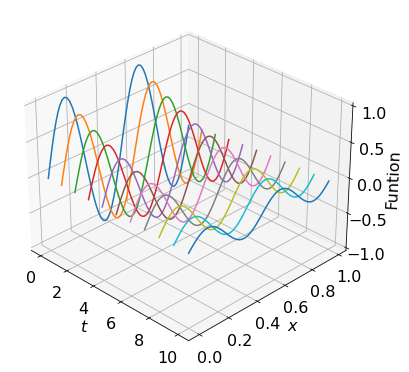

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

#%% Parameter setting
# Numerical setting
NN = 2**6 # spatial resoltuion
dt = 1e-3 # time step size
TT = 0.01 # final time
LL = 1 # spatial domain size

# Coefficients that appear in the the function
aa = 2.
CC = 2*np.pi/LL
AA = aa*CC

# function to plot (lambda function)
fn_lamb = lambda t, x: np.exp(-AA*AA*t) * np.sin(AA*x)

#%% Preparations
KK = int(TT/dt) # number of time steps
hh = LL/NN # spatial grid spacing
xx = np.arange(0, LL, hh) # spatial grid points
tt = np.arange(0, TT + dt, dt).reshape(-1, 1) # time grid points

fn = fn_lamb(tt, xx) # actual grid function

#%% Plotting
fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw={'projection':'3d'})

for i in range(0, KK + 1):
    ax.plot(i * np.ones_like(xx), xx, fn[i, :])

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('Funtion')

# Change the angle of projection
ax.view_init(elev=30, azim=-45)

plt.show()
